In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from time import time
import pandas as pd
from scipy.spatial import distance_matrix

%matplotlib inline

In [2]:
images_flat = pd.read_csv('/lustre/MHPC17/pierocor/thesis/data/images_flat_1001b.csv', sep='\t')
print(images_flat.info(verbose=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146916 entries, 0 to 146915
Columns: 1013 entries, Unnamed: 0 to 1000
dtypes: float64(1002), int64(6), object(5)
memory usage: 1.1+ GB
None


In [3]:
X = images_flat.loc[(images_flat['scale_unit'] == 'μm') & \
                    ( (images_flat['scale_digit'] == 1) | (images_flat['scale_digit'] == 2) )].reset_index()
sample_indices = []
N_samples = [0]
np.random.seed(2) # SEED!!!!! default: 2
print("cat\tN_cat\tN_samples")
for cat in range(10):
    N_cat = len(X.loc[X['nffa_category']==cat])
    N_samples.append(min(max(N_cat//20, 20),N_cat))
    print(cat,'\t', N_cat,'\t', N_samples[-1])
    sample_indices += X.loc[X['nffa_category']==cat].index[np.random.choice(N_cat, size=N_samples[-1], replace=False)].tolist()
print("Total samples:\t", len(sample_indices))

cat	N_cat	N_samples
0 	 54 	 20
1 	 1400 	 70
2 	 931 	 46
3 	 144 	 20
4 	 235 	 20
5 	 709 	 35
6 	 1890 	 94
7 	 587 	 29
8 	 1566 	 78
9 	 19 	 19
Total samples:	 431


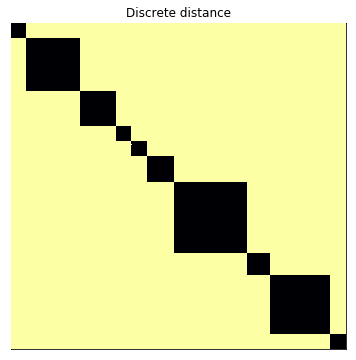

In [4]:
discrete_dist = np.ones((len(sample_indices),len(sample_indices)), dtype=int)
for i,index in enumerate(sample_indices):
    discrete_dist[i,:]= X['nffa_category'].loc[sample_indices]!=X['nffa_category'].loc[index]

fig,axn = plt.subplots(1, 1, figsize=(6,6))
ticks = np.cumsum(N_samples)
inv_ticks = ticks[-1]-ticks
plt.setp(axn, xticks=[], yticks=[])
fig.add_subplot(1,1,1)    
plt.title("Discrete distance")
sns.heatmap(discrete_dist, cmap=plt.get_cmap("inferno"),cbar=False, xticklabels=False,\
            yticklabels=False)

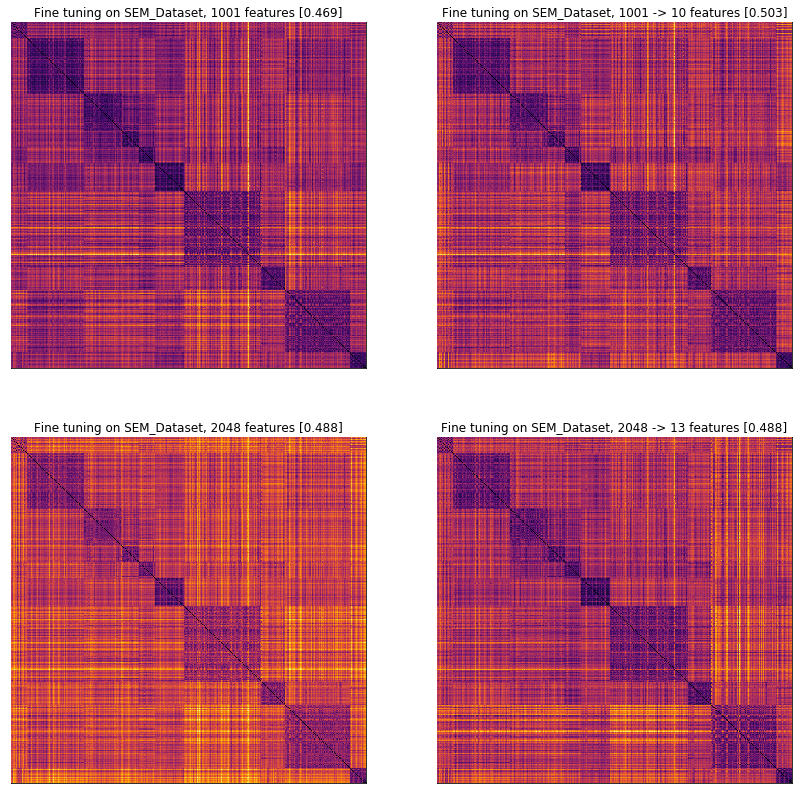

In [9]:
fig,axn = plt.subplots(2, 2, figsize=(14,14))
plt.setp(axn, xticks=[], yticks=[])
fig.add_subplot(2,2,1)
X = pd.read_csv('/lustre/MHPC17/pierocor/thesis/data/1u-2u_1001b.csv', sep='\t')
dist = distance_matrix(X[[str(i) for i in range(1001)]].loc[sample_indices],\
                       X[[str(i) for i in range(1001)]].loc[sample_indices])
plt.title("Fine tuning on SEM_Dataset, 1001 features "+\
          "[{:.3f}]".format(sp.stats.pearsonr(dist.reshape((-1,)), discrete_dist.reshape((-1,)))[0]))
sns.heatmap(dist, cmap=plt.get_cmap("inferno"),cbar=False, xticklabels=False, yticklabels=False)

fig.add_subplot(2,2,2)
X = pd.read_csv('/lustre/MHPC17/pierocor/thesis/data/1u-2u_1001b_10.csv', sep='\t')
dist = distance_matrix(X[[str(i) for i in range(10)]].loc[sample_indices],\
                       X[[str(i) for i in range(10)]].loc[sample_indices])
plt.title("Fine tuning on SEM_Dataset, 1001 -> 10 features "+\
          "[{:.3f}]".format(sp.stats.pearsonr(dist.reshape((-1,)), discrete_dist.reshape((-1,)))[0]))
sns.heatmap(dist, cmap=plt.get_cmap("inferno"),cbar=False, xticklabels=False, yticklabels=False)

fig.add_subplot(2,2,3)
X = pd.read_csv('/lustre/MHPC17/pierocor/thesis/data/1u-2u_2048b.csv', sep='\t')
dist = distance_matrix(X[[str(i) for i in range(2048)]].loc[sample_indices],\
                       X[[str(i) for i in range(2048)]].loc[sample_indices])
plt.title("Fine tuning on SEM_Dataset, 2048 features "+\
          "[{:.3f}]".format(sp.stats.pearsonr(dist.reshape((-1,)), discrete_dist.reshape((-1,)))[0]))
sns.heatmap(dist, cmap=plt.get_cmap("inferno"),cbar=False, xticklabels=False, yticklabels=False)

fig.add_subplot(2,2,4)
X = pd.read_csv('/lustre/MHPC17/pierocor/thesis/data/1u-2u_2048b_13.csv', sep='\t')
dist = distance_matrix(X[[str(i) for i in range(13)]].loc[sample_indices],\
                       X[[str(i) for i in range(13)]].loc[sample_indices])
plt.title("Fine tuning on SEM_Dataset, 2048 -> 13 features "+\
          "[{:.3f}]".format(sp.stats.pearsonr(dist.reshape((-1,)), discrete_dist.reshape((-1,)))[0]))
sns.heatmap(dist, cmap=plt.get_cmap("inferno"),cbar=False, xticklabels=False, yticklabels=False)


# Dropout 2048

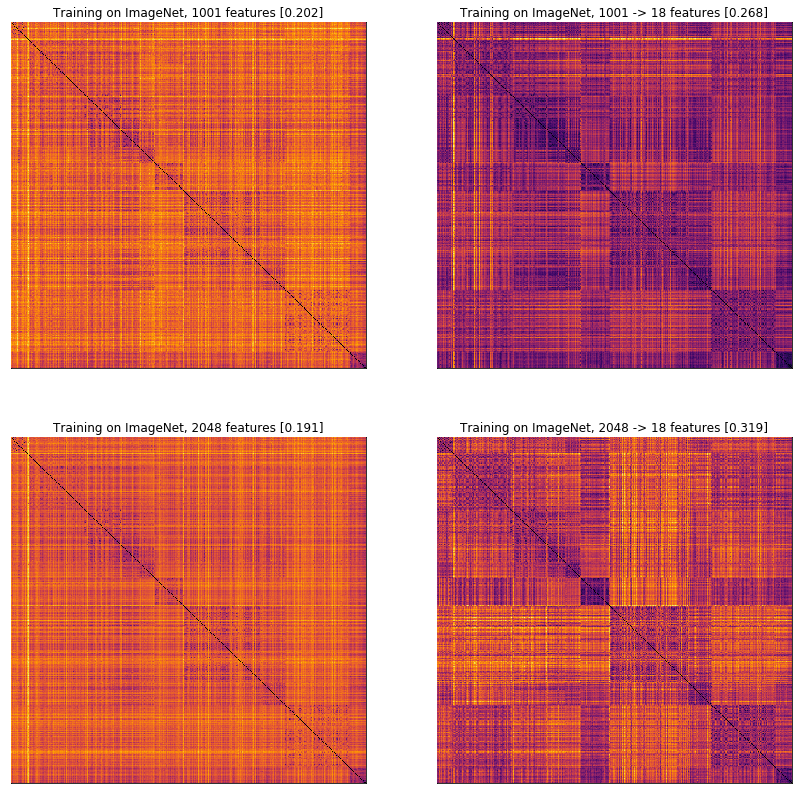

In [10]:
fig,axn = plt.subplots(2, 2, figsize=(14,14))
plt.setp(axn, xticks=[], yticks=[])
fig.add_subplot(2,2,1)
X = pd.read_csv('/lustre/MHPC17/pierocor/thesis/data/1u-2u_1001i.csv', sep='\t')
dist = distance_matrix(X[[str(i) for i in range(1001)]].loc[sample_indices],\
                       X[[str(i) for i in range(1001)]].loc[sample_indices])
plt.title("Training on ImageNet, 1001 features "+\
          "[{:.3f}]".format(sp.stats.pearsonr(dist.reshape((-1,)), discrete_dist.reshape((-1,)))[0]))
sns.heatmap(dist, cmap=plt.get_cmap("inferno"),cbar=False, xticklabels=False, yticklabels=False)

fig.add_subplot(2,2,2)
X = pd.read_csv('/lustre/MHPC17/pierocor/thesis/data/1u-2u_1001i_18.csv', sep='\t')
dist = distance_matrix(X[[str(i) for i in range(18)]].loc[sample_indices],\
                       X[[str(i) for i in range(18)]].loc[sample_indices])
plt.title("Training on ImageNet, 1001 -> 18 features "+\
          "[{:.3f}]".format(sp.stats.pearsonr(dist.reshape((-1,)), discrete_dist.reshape((-1,)))[0]))
sns.heatmap(dist, cmap=plt.get_cmap("inferno"),cbar=False, xticklabels=False, yticklabels=False)

fig.add_subplot(2,2,3)
X = pd.read_csv('/lustre/MHPC17/pierocor/thesis/data/1u-2u_2048i.csv', sep='\t')
dist = distance_matrix(X[[str(i) for i in range(2048)]].loc[sample_indices],\
                       X[[str(i) for i in range(2048)]].loc[sample_indices])
plt.title("Training on ImageNet, 2048 features "+\
          "[{:.3f}]".format(sp.stats.pearsonr(dist.reshape((-1,)), discrete_dist.reshape((-1,)))[0]))
sns.heatmap(dist, cmap=plt.get_cmap("inferno"),cbar=False, xticklabels=False, yticklabels=False)

fig.add_subplot(2,2,4)
X = pd.read_csv('/lustre/MHPC17/pierocor/thesis/data/1u-2u_2048i_18.csv', sep='\t')
dist = distance_matrix(X[[str(i) for i in range(18)]].loc[sample_indices],\
                       X[[str(i) for i in range(18)]].loc[sample_indices])
plt.title("Training on ImageNet, 2048 -> 18 features "+\
          "[{:.3f}]".format(sp.stats.pearsonr(dist.reshape((-1,)), discrete_dist.reshape((-1,)))[0]))
sns.heatmap(dist, cmap=plt.get_cmap("inferno"),cbar=False, xticklabels=False, yticklabels=False)